In [1]:
import spacy

nlp = spacy.load("en_core_web_sm")

def classify_noun(noun):
    doc = nlp(noun)

    # 1. 代词直接归类为 PERSON
    if doc[0].pos_ == "PRON":
        return "PERSON"

    # 2. NER categories
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            return "PERSON"
        elif ent.label_ in ["PRODUCT", "ORG", "WORK_OF_ART", "LAW", "EVENT"]:
            return "PRODUCT"
    
    # 3. 默认 OTHER
    return "OTHER"



In [6]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Input text
text = "I think this locket is really pretty. The inside back is a solid silver depression and the front is a dome that is not solid (knotted). You could use it to store a small photo, lock of hair, etc but I use it when I need to carry medication with me. Closes securely. High quality & very pretty."

# Process text with spaCy pipeline
doc = nlp(text)

# Extract adjective-noun pairs (形容词修饰名词)
pairs = []
for token in doc:
    # Check if token is adjective and its dependency label is 'amod'
    if token.pos_ == "ADJ" and token.dep_ == "amod":
        head = token.head  # The noun modified by this adjective
        if head.pos_ == "NOUN":
            pairs.append((token.text, head.text))

# Print results
print("Adjective-Noun pairs:")
for adj, noun in pairs:
    print(f"{adj} -> {noun}")

Adjective-Noun pairs:
inside -> back
solid -> depression
silver -> depression
small -> photo
High -> quality


In [3]:
tests = ["John", "Nike", "iPhone", "I", "me", "photo", "quality", "wallet"]

for t in tests:
    print(f"{t:10} → {classify_noun(t)}")


John       → PERSON
Nike       → PRODUCT
iPhone     → OTHER
I          → PERSON
me         → PERSON
photo      → OTHER
quality    → OTHER
wallet     → OTHER


## reddit

In [2]:
import pandas as pd
import os

path = "/home/artemuna/.cache/kagglehub/datasets/smagnan/1-million-reddit-comments-from-40-subreddits/versions/1"

# 自动找到第一个 csv
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]

df = pd.read_csv(os.path.join(path, csv_files[0]))

print(df.head())
print(df.shape)

       subreddit                                               body  \
0  gameofthrones  Your submission has been automatically removed...   
1            aww  Dont squeeze her with you massive hand, you me...   
2         gaming  It's pretty well known and it was a paid produ...   
3           news  You know we have laws against that currently c...   
4       politics  Yes, there is a difference between gentle supp...   

   controversiality  score  
0                 0      1  
1                 0     19  
2                 0      3  
3                 0     10  
4                 0      1  
(1000000, 4)


In [3]:
df["body"].head()


0    Your submission has been automatically removed...
1    Dont squeeze her with you massive hand, you me...
2    It's pretty well known and it was a paid produ...
3    You know we have laws against that currently c...
4    Yes, there is a difference between gentle supp...
Name: body, dtype: object

In [4]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# --- your original function, unchanged ---
def extract_pairs(text):
    doc = nlp(text)
    pairs = []
    for token in doc:
        if token.pos_ == "ADJ" and token.dep_ == "amod":
            head = token.head
            if head.pos_ == "NOUN":
                pairs.append((token.text, head.text))
    return pairs
# ------------------------------------------


# --- apply to df['body'] ---
all_pairs = []

for i, body in enumerate(df["body"]):
    if isinstance(body, str):
        all_pairs.extend(extract_pairs(body))

# Show result
print("Total pairs:", len(all_pairs))
print(all_pairs[:20])



Total pairs: 1109979
[('bracketed', 'tag'), ('massive', 'hand'), ('biggest', 'placement'), ('old', 'merch'), ('favorite', 'food'), ('correct', 'laws'), ('gentle', 'suppression'), ('hard', 'suppression'), ('good', 'things'), ('straight', 'answer'), ('many', 'millions'), ('amazing', 'tradition'), ('giant', 'turd'), ('other', 'possibilities'), ('single', 'people'), ('cool', 'people'), ('other', 'woman'), ('harmless', 'fun'), ('Nice', 'try'), ('scientific', 'mumbo')]


In [5]:
import pandas as pd

# all_pairs = [("adj", "noun"), ...]  # 你前面生成好的

df_pairs = pd.DataFrame(all_pairs, columns=["adj", "noun"])
df_pairs.to_csv("all_pairs.csv", index=False)

print("saved to all_pairs.csv")


saved to all_pairs.csv


In [12]:
all_pairs[0]


('bracketed', 'tag')

In [33]:
# Define first group as p1
p1 = [
    "national",
    "dangerous",
    "long",
    "hot",
    "public",
    "whole",
    "simple",
    "hard",
    "small",
    "poor",
    "large",
    "now",
    "private",
    "different",
    "high",
    "good",
    "awesome",
    "great"
]

# Define second group as h1
h1 = [
    "excellent",
    "current",
    "real",
    "amazing",
    "low",
    "lost",
    "full",
    "fantastic",
    "special",
    "beautiful",
    "nice",
    "right",
    "available",
    "wonderful",
    "legal",
    "local",
    "fine",
    "easy",
    "political",
    "old",
    "close",
    "strong",
    "professional",
    "busy",
    "helpful",
    "friendly",
    "ready",
    "pleasant",
    "happy",
    "militant",
    "willing",
    "young",
    "junior",
    "senior",
    "able",
    "concerned",
    "pleased",
    "sure",
    "interested",
    "glad"
]

# Optional: combine them if needed
word_division = [p1, h1]

print("p1 length:", len(p1))
print("h1 length:", len(h1))
print("total words:", len(p1) + len(h1))


p1 length: 18
h1 length: 40
total words: 58


In [16]:
import pandas as pd

# Convert raw pairs list
df_pairs = pd.DataFrame(all_pairs, columns=["adj", "noun"])

# ---- 1. Count by (adj, noun) ----
df_pair_count = (
    df_pairs.groupby(["adj", "noun"])
            .size()
            .reset_index(name="count")
            .sort_values("count", ascending=False)
            .reset_index(drop=True)
)

# ---- 2. Count adjectives alone ----
df_adj_count = (
    df_pairs.groupby("adj")
            .size()
            .reset_index(name="count")
            .sort_values("count", ascending=False)
            .reset_index(drop=True)
)

print("pair count:")
print(df_pair_count.head())

print("\nadj count:")
print(df_adj_count.head())


pair count:
       adj    noun  count
0     many  points   5249
1     same   thing   2990
2    other  people   2772
3  Highest     bid   2663
4     safe    swap   2654

adj count:
     adj  count
0  other  34606
1   good  25707
2   more  21649
3   same  21243
4   many  20311


In [19]:
print(len(df_pair_count),len(df_adj_count))

381283 25546


In [24]:
# 假设你已经有：
# df_pair_count: columns = ["adj", "noun", "count"]
# df_adj_count : columns = ["adj", "count"]  # adj 的总频率

# 1. 把 df_adj_count 的 count 重命名成 adj_total
df_adj_total = df_adj_count.rename(columns={"count": "adj_total"})

# 2. 将 adj_total 合并进 df_pair_count
df_pair_merged = df_pair_count.merge(df_adj_total, on="adj", how="left")

# 3. 过滤掉 adj_total < 50 的所有 pair
df50_pair_count = df_pair_merged[df_pair_merged["adj_total"] >= 50].reset_index(drop=True)

# 4. 结果 DataFrame 就在这里
df50_pair_count.head()


,adj,noun,count,adj_total
0,many,points,5249,20311
1,same,thing,2990,21243
2,other,people,2772,34606
3,Highest,bid,2663,2703
4,safe,swap,2654,3483


In [26]:
len(df50_pair_count)

300218

In [27]:
df50_pair_count.to_csv("df50_pair_count.csv", index=False)
print("Saved to df50_pair_count.csv")


Saved to df50_pair_count.csv


In [28]:
dfhp1 = pd.read_csv("/mnt/c/Users/Administrator/Downloads/final_df50_pair_manual_judgment.csv")


In [29]:
dfhp1.head()

,adj,noun,count,adj_total,noun_category
0,many,points,5249,20311,PRODUCT
1,same,thing,2990,21243,PRODUCT
2,other,people,2772,34606,PERSON
3,Highest,bid,2663,2703,PRODUCT
4,safe,swap,2654,3483,PRODUCT


In [ ]:
# Convert to sets (faster)
p1_set = set(p1)
h1_set = set(h1)

# Filter df_adj_count to only words in p1
df_p1_counts = (
    df_adj_count[df_adj_count["adj"].isin(p1_set)]
        .sort_values("count", ascending=False)
        .reset_index(drop=True)
)

# Filter df_adj_count to only words in h1
df_h1_counts = (
    df_adj_count[df_adj_count["adj"].isin(h1_set)]
        .sort_values("count", ascending=False)
        .reset_index(drop=True)
)

print("=== p1 each word count ===")
print(df_p1_counts)





=== p1 each word count ===
          adj  count
0        good  25707
1       whole  10520
2   different   9780
3       great   9276
4        long   6913
5        high   6761
6       small   4277
7      public   2934
8        poor   2772
9        hard   2771
10      large   2516
11        hot   2135
12    private   1453
13     simple   1404
14   national   1034
15    awesome    833
16  dangerous    648
17        now      2

=== h1 each word count ===
             adj  count
0           real   8698
1            old   8100
2           full   6440
3          right   5184
4      political   4312
5            low   3840
6           nice   3563
7        current   2726
8          young   2367
9        amazing   1863
10         legal   1789
11       special   1733
12        strong   1640
13         local   1588
14     beautiful   1496
15          easy   1227
16         close   1069
17         happy   1057
18  professional    886
19          fine    697
20     available    548
21     wonderful  

In [22]:
print("\n=== h1 each word count ===")
print(df_h1_counts)


=== h1 each word count ===
             adj  count
0           real   8698
1            old   8100
2           full   6440
3          right   5184
4      political   4312
5            low   3840
6           nice   3563
7        current   2726
8          young   2367
9        amazing   1863
10         legal   1789
11       special   1733
12        strong   1640
13         local   1588
14     beautiful   1496
15          easy   1227
16         close   1069
17         happy   1057
18  professional    886
19          fine    697
20     available    548
21     wonderful    515
22          sure    479
23     fantastic    470
24     excellent    460
25      friendly    409
26        senior    305
27       helpful    251
28         ready    205
29       willing    181
30          busy    160
31          lost    149
32          able    112
33      pleasant     98
34        junior     72
35    interested     69
36          glad     64
37     concerned     47
38      militant     29
39       ple

In [23]:
df_pair_count.to_csv("df_pair_count.csv", index=False)
print("Saved as df_pair_count.csv")


Saved as df_pair_count.csv


## zhedie

In [5]:
from collections import Counter
import pandas as pd

def count_adj_frequency(annotated_list):
    adjs = [row[0] for row in annotated_list]
    counter = Counter(adjs)
    df = pd.DataFrame(counter.items(), columns=["adj", "count"])
    df = df.sort_values(by="count", ascending=False).reset_index(drop=True)
    return df


In [6]:
adj_freq_df = count_adj_frequency(annotated_list)
print(adj_freq_df.head(20))    # 前20个最常见 adj


NameError: name 'annotated_list' is not defined

In [ ]:
filtered_adj = adj_freq_df[adj_freq_df["count"] > 50]
print(filtered_adj)


In [ ]:
import pandas as pd
from collections import defaultdict

def adj_category_stats(annotated_list):
    # 结构：{ adj -> {category -> count} }
    stats = defaultdict(lambda: defaultdict(int))

    for adj, noun, cat in annotated_list:
        stats[adj][cat] += 1

    # 转换成 DataFrame
    rows = []
    for adj, cats in stats.items():
        total = sum(cats.values())
        person = cats.get("PERSON", 0)
        product = cats.get("PRODUCT", 0)
        other = cats.get("OTHER", 0)

        rows.append([
            adj,
            total,
            person / total if total else 0,
            product / total if total else 0,
            other / total if total else 0,
            person, product, other
        ])

    df = pd.DataFrame(rows, columns=[
        "adj", "total",
        "person_ratio", "product_ratio", "other_ratio",
        "person_count", "product_count", "other_count"
    ])

    # 按 “person 占比” 排序
    df = df.sort_values(by="person_ratio", ascending=False).reset_index(drop=True)
    return df


In [ ]:
import spacy

# Load English model
nlp = spacy.load("en_core_web_sm")

# Input text
text = "I think this locket is really pretty. The inside back is a solid silver depression and the front is a dome that is not solid (knotted). You could use it to store a small photo, lock of hair, etc but I use it when I need to carry medication with me. Closes securely. High quality & very pretty."

# Process text with spaCy pipeline
doc = nlp(text)

# Extract adjective-noun pairs (形容词修饰名词)
pairs = []
for token in doc:
    # Check if token is adjective and its dependency label is 'amod'
    if token.pos_ == "ADJ" and token.dep_ == "amod":
        head = token.head  # The noun modified by this adjective
        if head.pos_ == "NOUN":
            pairs.append((token.text, head.text))

# Print results
print("Adjective-Noun pairs:")
for adj, noun in pairs:
    print(f"{adj} -> {noun}")

In [ ]:
adj_stats_df = adj_category_stats(annotated_list)
print(adj_stats_df.head(20))   # person 占比最高的 adj


In [35]:
import pandas as pd

# 加载你的 dfhp1 DataFrame


# 指定形容词列表


# 定义函数：返回一行 {adj, PERSON_count, PRODUCT_count, OTHER_count}
def compute_counts(df, adj):
    sub_df = df[df["adj"] == adj]
    grouped = sub_df.groupby("noun_category")["count"].sum().to_dict()
    return {
        "adj": adj,
        "PERSON": grouped.get("PERSON", 0),
        "PRODUCT": grouped.get("PRODUCT", 0),
        "OTHER": grouped.get("OTHER", 0)
    }

# 分别处理 h1 和 p1
h1_df = pd.DataFrame([compute_counts(dfhp1, adj) for adj in h1])
p1_df = pd.DataFrame([compute_counts(dfhp1, adj) for adj in p1])

# 查看结果
print(h1_df)



             adj  PERSON  PRODUCT  OTHER
0      excellent       6      409     45
1        current      20     2184    522
2           real     270     7355   1073
3        amazing      78     1615    170
4            low      29     2943    868
5           lost       3      133     13
6           full      18     5075   1347
7      fantastic       8      422     40
8        special      30     1515    188
9      beautiful     141     1300     55
10          nice     175     3164    224
11         right     164     4485    535
12     available       4      470     74
13     wonderful      42      415     58
14         legal       5     1535    249
15         local      16     1382    190
16          fine      83      576     38
17          easy      10     1118     99
18     political      11     3928    373
19           old    1263     6604    233
20         close      27      838    204
21        strong      75     1283    282
22  professional       7      782     97
23          busy

In [36]:
print(p1_df)

          adj  PERSON  PRODUCT  OTHER
0    national       3      818    213
1   dangerous      25      544     79
2        long       9     4564   2340
3         hot      51     2058     26
4      public       5     2245    684
5       whole      42     8927   1551
6      simple      64     1133    207
7        hard      26     2114    631
8       small      84     3561    632
9        poor     529     2007    236
10      large      13     2068    435
11        now       0        0      0
12    private      12     1258    183
13  different     327     8782    671
14       high      28     5721   1012
15       good    1273    21159   3275
16    awesome      37      723     73
17      great     189     7890   1197


In [32]:
len(p1_df)

4

In [40]:
import pandas as pd

# 加载你处理后的 CSV 文件（调整路径为你本地路径）




# 筛选并排序 h1 中的 pair
dfhph = dfhp1[dfhp1["adj"].isin(h1)].copy()
dfhph = dfhph.sort_values(by=["adj", "count"], ascending=[True, False])
dfhph.to_csv("dfhph_sorted.csv", index=False)

# 筛选并排序 p1 中的 pair
dfhpp = dfhp1[dfhp1["adj"].isin(p1)].copy()
dfhpp = dfhpp.sort_values(by=["adj", "count"], ascending=[True, False])
dfhpp.to_csv("dfhpp_sorted.csv", index=False)

print("✅ 已保存 dfhph_sorted.csv 和 dfhpp_sorted.csv")


✅ 已保存 dfhph_sorted.csv 和 dfhpp_sorted.csv


In [39]:
dfhp1.head()

,adj,noun,count,adj_total,noun_category
0,many,points,5249,20311,PRODUCT
1,same,thing,2990,21243,PRODUCT
2,other,people,2772,34606,PERSON
3,Highest,bid,2663,2703,PRODUCT
4,safe,swap,2654,3483,PRODUCT


In [44]:
import pandas as pd

# ===== 已经有的三个 df，不需要重新读取 =====
# dfhp1（含全局 noun_category）
# p1_df（列：adj, PERSON, PRODUCT, OTHER）
# h1_df（列：adj, PERSON, PRODUCT, OTHER）

# ===== 1. 计算 dfhp1 的全局 PERSON / PRODUCT 加权总量 =====
global_counts = dfhp1.groupby("noun_category")["count"].sum().to_dict()
global_person = global_counts.get("PERSON", 0)
global_product = global_counts.get("PRODUCT", 0)

scaling_factor = global_person / global_product if global_product else 1.0


# ===== 2. 定义函数：基于已有列 PERSON / PRODUCT 直接计算归一化 =====
def process_adj_df(df):
    rows = []

    for _, row in df.iterrows():
        adj = row["adj"]
        p = row["PERSON"]
        pr = row["PRODUCT"]

        # ---- raw ratio ----
        raw_total = p + pr
        raw_p_ratio = p / raw_total if raw_total else 0
        raw_pr_ratio = pr / raw_total if raw_total else 0

        # ---- normalized ratio ----
        pr_scaled = pr * scaling_factor
        norm_total = p + pr_scaled

        norm_p_ratio = p / norm_total if norm_total else 0
        norm_pr_ratio = pr_scaled / norm_total if norm_total else 0

        rows.append({
            "adj": adj,
            "PERSON_raw": p,
            "PRODUCT_raw": pr,
            "PERSON_raw_ratio": raw_p_ratio,
            "PRODUCT_raw_ratio": raw_pr_ratio,
            "PERSON_norm_ratio": norm_p_ratio,
            "PRODUCT_norm_ratio": norm_pr_ratio
        })

    return pd.DataFrame(rows)


# ===== 3. 分别处理 p1_df 和 h1_df =====
p1_adj_norm = process_adj_df(p1_df)
h1_adj_norm = process_adj_df(h1_df)

# ===== 4. 保存结果 =====
p1_adj_norm.to_csv("p1_adj_normalized_no_other.csv", index=False)
h1_adj_norm.to_csv("h1_adj_normalized_no_other.csv", index=False)

print("Done!")


Done!


p1 PERSON_norm_ratio 平均: 0.2898606770001916
h1 PERSON_norm_ratio 平均: 0.4129921759039797


<Figure size 800x600 with 0 Axes>

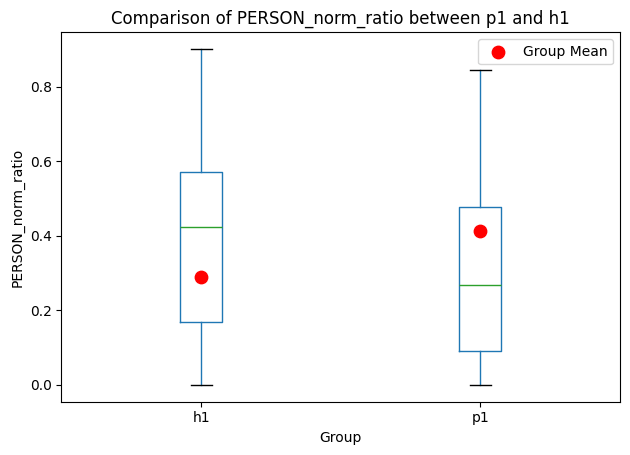

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取你的归一化结果（替换路径）
p1_norm = pd.read_csv("p1_adj_normalized_no_other.csv")
h1_norm = pd.read_csv("h1_adj_normalized_no_other.csv")

# ==== 1. 计算两组的均值 ====
p1_mean = p1_norm["PERSON_norm_ratio"].mean()
h1_mean = h1_norm["PERSON_norm_ratio"].mean()

print("p1 PERSON_norm_ratio 平均:", p1_mean)
print("h1 PERSON_norm_ratio 平均:", h1_mean)

# ==== 2. 准备画图数据 ====
plot_df = pd.DataFrame({
    "group": ["p1"] * len(p1_norm) + ["h1"] * len(h1_norm),
    "PERSON_norm_ratio": list(p1_norm["PERSON_norm_ratio"]) + list(h1_norm["PERSON_norm_ratio"])
})

# ==== 3. 画箱线图 + 均值 ====
plt.figure(figsize=(8, 6))

# 箱线图
plot_df.boxplot(by="group", column="PERSON_norm_ratio", grid=False)

# 均值点
plt.scatter([1, 2], [p1_mean, h1_mean], color="red", s=80, label="Group Mean")

plt.title("Comparison of PERSON_norm_ratio between p1 and h1")
plt.suptitle("")  # 去掉 boxplot 自动标题
plt.xlabel("Group")
plt.ylabel("PERSON_norm_ratio")
plt.legend()

plt.tight_layout()
plt.show()


T-statistic: -1.7611885889465348
p-value: 0.08650610092619763


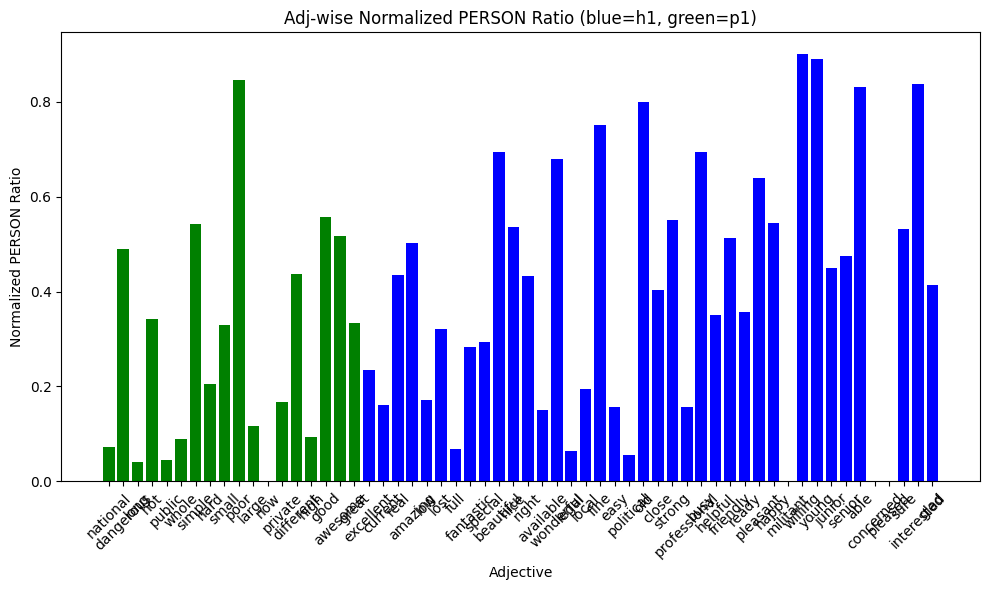

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# ======== 1. 不读取文件，你已有 p1_norm, h1_norm ========

# PERSON_norm_ratio 列
p1_vals = p1_norm["PERSON_norm_ratio"]
h1_vals = h1_norm["PERSON_norm_ratio"]

# ======== 2. t-test 比较两组差异 ========
t_stat, p_value = ttest_ind(p1_vals, h1_vals, equal_var=False)

print("T-statistic:", t_stat)
print("p-value:", p_value)

# ======== 3. 按原来的 p1 → h1 顺序组合 ========
# 你已经有 p1 和 h1 的原始顺序：
# p1 = ["nice", "friendly", "rude", "polite"]
# h1 = ["high", "great", "useful", "excellent"]

# 给每个 df 加 group 标签
p1_norm["group"] = "p1"
h1_norm["group"] = "h1"

# 按 “p1 的顺序 + h1 的顺序” 来构建最终顺序
final_order = list(p1_norm["adj"]) + list(h1_norm["adj"])

combined = pd.concat([p1_norm, h1_norm], ignore_index=True)

# 按自定义顺序排序，而不是字母顺序
combined["order"] = combined["adj"].apply(lambda x: final_order.index(x))
combined = combined.sort_values("order")

# ======== 4. 绘图 ========
plt.figure(figsize=(10, 6))

colors = combined["group"].map({"h1": "blue", "p1": "green"})

plt.bar(
    combined["adj"],
    combined["PERSON_norm_ratio"],
    color=colors
)

plt.xlabel("Adjective")
plt.ylabel("Normalized PERSON Ratio")
plt.title("Adj-wise Normalized PERSON Ratio (blue=h1, green=p1)")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()



## test

In [ ]:
person_lexicon = [
    # --- A: 人称代词 ---
    "i", "you", "he", "she", "we", "they",
    "me", "him", "her", "us", "them",
    "my", "your", "his", "her", "our", "their",
    "mine", "yours", "hers", "ours", "theirs",
    "myself", "yourself", "himself", "herself",
    "ourselves", "themselves",

    # --- B: 泛指人类 ---
    "person", "people", "human", "humans", "individual", "individuals",
    "man", "woman", "men", "women",
    "guy", "guys", "girl", "girls", "boy", "boys",
    "child", "children", "kid", "kids",
    "adult", "adults", "teen", "teens", "teenager", "teenagers",

    # --- C: 常见职业 / 社会角色（高频） ---
    "teacher", "doctor", "nurse", "driver", "customer",
    "worker", "employee", "employer",
    "student", "passenger", "client", "manager",
    "police", "officer", "chef", "waiter", "waitress",
    "farmer", "engineer", "scientist", "actor", "actress",
    "boss", "colleague", "partner", "friend", "buddy",

    # --- D: 称呼类词 ---
    "sir", "madam", "bro", "dude", "mate", "folks", "buddy", "pal"
]


In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

def classify_noun(noun):
    doc = nlp(noun)

    # 1. pronoun = PERSON
    if doc[0].pos_ == "PRON":
        return "PERSON"

    # 2. NER
    for ent in doc.ents:
        if ent.label_ == "PERSON":
            return "PERSON"
        elif ent.label_ in ["PRODUCT", "ORG", "WORK_OF_ART", "LAW", "EVENT"]:
            return "PRODUCT"
    
    # 3. default
    return "OTHER"


def check_nouns(noun_list):
    results = {}
    for noun in noun_list:
        label = classify_noun(noun)
        print(f"{noun:20s} → {label}")
        results[noun] = label
    return results


# Example test nouns
test_nouns = [
    "he", "you", "guy", "teacher",
    "phone", "computer", "car",
    "London", "Google", "iPhone 13", "Statue of Liberty"
]




he                   → PERSON
you                  → PERSON
guy                  → OTHER
teacher              → OTHER
phone                → OTHER
computer             → OTHER
car                  → OTHER
London               → OTHER
Google               → OTHER
iPhone 13            → OTHER
Statue of Liberty    → OTHER


{'he': 'PERSON',
 'you': 'PERSON',
 'guy': 'OTHER',
 'teacher': 'OTHER',
 'phone': 'OTHER',
 'computer': 'OTHER',
 'car': 'OTHER',
 'London': 'OTHER',
 'Google': 'OTHER',
 'iPhone 13': 'OTHER',
 'Statue of Liberty': 'OTHER'}

In [3]:
check_nouns(person_lexicon)

i                    → PERSON
you                  → PERSON
he                   → PERSON
she                  → PERSON
we                   → PERSON
they                 → PERSON
me                   → PERSON
him                  → PERSON
her                  → PERSON
us                   → PERSON
them                 → PERSON
my                   → PERSON
your                 → PERSON
his                  → PERSON
her                  → PERSON
our                  → PERSON
their                → PERSON
mine                 → OTHER
yours                → OTHER
hers                 → OTHER
ours                 → OTHER
theirs               → OTHER
myself               → PERSON
yourself             → PERSON
himself              → PERSON
herself              → PERSON
ourselves            → PERSON
themselves           → PERSON
person               → OTHER
people               → OTHER
human                → OTHER
humans               → OTHER
individual           → OTHER
individuals         

{'i': 'PERSON',
 'you': 'PERSON',
 'he': 'PERSON',
 'she': 'PERSON',
 'we': 'PERSON',
 'they': 'PERSON',
 'me': 'PERSON',
 'him': 'PERSON',
 'her': 'PERSON',
 'us': 'PERSON',
 'them': 'PERSON',
 'my': 'PERSON',
 'your': 'PERSON',
 'his': 'PERSON',
 'our': 'PERSON',
 'their': 'PERSON',
 'mine': 'OTHER',
 'yours': 'OTHER',
 'hers': 'OTHER',
 'ours': 'OTHER',
 'theirs': 'OTHER',
 'myself': 'PERSON',
 'yourself': 'PERSON',
 'himself': 'PERSON',
 'herself': 'PERSON',
 'ourselves': 'PERSON',
 'themselves': 'PERSON',
 'person': 'OTHER',
 'people': 'OTHER',
 'human': 'OTHER',
 'humans': 'OTHER',
 'individual': 'OTHER',
 'individuals': 'OTHER',
 'man': 'OTHER',
 'woman': 'OTHER',
 'men': 'OTHER',
 'women': 'OTHER',
 'guy': 'OTHER',
 'guys': 'OTHER',
 'girl': 'OTHER',
 'girls': 'OTHER',
 'boy': 'OTHER',
 'boys': 'OTHER',
 'child': 'OTHER',
 'children': 'OTHER',
 'kid': 'OTHER',
 'kids': 'OTHER',
 'adult': 'PRODUCT',
 'adults': 'OTHER',
 'teen': 'OTHER',
 'teens': 'OTHER',
 'teenager': 'OTHER',
 

## bert

In [1]:
from transformers import AutoTokenizer, AutoModelForTokenClassification
from transformers import pipeline

tokenizer = AutoTokenizer.from_pretrained("dslim/bert-large-NER")
model = AutoModelForTokenClassification.from_pretrained("dslim/bert-large-NER")

nlp = pipeline("ner", model=model, tokenizer=tokenizer)
example = "My name is Wolfgang and I live in Berlin"

ner_results = nlp(example)
print(ner_results)


/home/artemuna/d1/nlpm/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at dslim/bert-large-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


[{'entity': 'B-PER', 'score': np.float32(0.9971501), 'index': 4, 'word': 'Wolfgang', 'start': 11, 'end': 19}, {'entity': 'B-LOC', 'score': np.float32(0.9986046), 'index': 9, 'word': 'Berlin', 'start': 34, 'end': 40}]


## wordnet

In [3]:
import nltk
nltk.download("wordnet")
nltk.download("omw-1.4")



[nltk_data] Downloading package wordnet to /home/artemuna/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/artemuna/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [5]:
from nltk.corpus import wordnet as wn

def wordnet_lexnames(noun):
    """Return a set of WordNet lexnames for this noun."""
    synsets = wn.synsets(noun, pos=wn.NOUN)
    return {s.lexname() for s in synsets}


def classify_wordnet(noun):
    """
    Classify noun into: PERSON / OBJECT / LOCATION / ORG / OTHER
    using WordNet semantic categories.
    """
    if not noun or not isinstance(noun, str):
        return "OTHER"

    token = noun.lower().strip()
    if not token:
        return "OTHER"

    lex = wordnet_lexnames(token)

    # Person class
    if "noun.person" in lex:
        return "PERSON"

    # Location class
    if "noun.location" in lex:
        return "LOCATION"

    # Organization / group class
    if "noun.group" in lex:
        return "ORG"

    # Object-like classes
    object_like = {
        "noun.artifact",
        "noun.object",
        "noun.animal",
        "noun.food",
        "noun.plant",
        "noun.body",
        "noun.substance"
    }
    if any(l in lex for l in object_like):
        return "OBJECT"

    return "OTHER"


In [6]:
def classify_list(words):
    """Print classification result for a list of nouns."""
    for w in words:
        label = classify_wordnet(w)
        print(f"{w:15s} → {label}")


In [7]:
test_words = [
    "teacher", "woman", "man", "child",
    "phone", "table", "car", "bottle",
    "dog", "apple", "tree",
    "London", "city",
    "university", "company", "team",
    "freedom", "wisdom"
]

classify_list(test_words)


teacher         → PERSON
woman           → PERSON
man             → PERSON
child           → PERSON
phone           → OBJECT
table           → ORG
car             → OBJECT
bottle          → OBJECT
dog             → PERSON
apple           → OBJECT
tree            → PERSON
London          → PERSON
city            → LOCATION
university      → ORG
company         → PERSON
team            → ORG
freedom         → OTHER
wisdom          → OTHER


In [12]:
from nltk.corpus import wordnet as wn

# Priority order for lexnames
PRIORITY = [
    ("noun.location", "LOCATION"),
    ("noun.person", "PERSON"),
    ("noun.group", "ORG"),      # but may be overridden later
    ("noun.artifact", "OBJECT"),
    ("noun.object", "OBJECT"),
    ("noun.animal", "OBJECT"),
    ("noun.plant", "OBJECT"),
    ("noun.food", "OBJECT"),
    ("noun.body", "OBJECT"),
    ("noun.substance", "OBJECT"),
]

def classify_wordnet_smart(noun):
    """
    Improved WordNet classifier:
    - Tries all synsets, choose the most 'physical' or 'entity-like' sense
    - Avoids misclassification from rare slang/biblical meanings
    """
    if not noun or not isinstance(noun, str):
        return "OTHER"

    token = noun.lower().strip()
    if not token:
        return "OTHER"

    synsets = wn.synsets(token, pos=wn.NOUN)
    if not synsets:
        return "OTHER"

    # Collect lexnames for all senses
    lexnames = [(s.lexname(), s) for s in synsets]

    # ---- Main priority-based matching ----
    for lex, _ in lexnames:
        for key, label in PRIORITY:
            if lex == key:
                return label

    # If nothing matches, classify abstract nouns as OTHER
    return "OTHER"


In [13]:
test_words = [
    "teacher", "woman", "man", "child",
    "phone", "table", "car", "bottle",
    "dog", "apple", "tree",
    "London", "city",
    "university", "company", "team",
    "freedom", "wisdom"
]

for w in test_words:
    print(f"{w:12s} → {classify_wordnet_smart(w)}")



teacher      → PERSON
woman        → PERSON
man          → PERSON
child        → PERSON
phone        → OBJECT
table        → ORG
car          → OBJECT
bottle       → OBJECT
dog          → OBJECT
apple        → OBJECT
tree         → OBJECT
London       → LOCATION
city         → LOCATION
university   → ORG
company      → ORG
team         → ORG
freedom      → OTHER
wisdom       → OTHER


In [14]:
test_words_20 = [
    "doctor", "nurse", "actor", "student", "customer",
    "computer", "keyboard", "chair", "television", "camera",
    "cat", "horse", "banana", "milk", "water",
    "Chicago", "Japan", "river", "mountain", "park"
]

for w in test_words_20:
    print(f"{w:12s} → {classify_wordnet_smart(w)}")


doctor       → PERSON
nurse        → PERSON
actor        → PERSON
student      → PERSON
customer     → PERSON
computer     → OBJECT
keyboard     → OBJECT
chair        → OBJECT
television   → OBJECT
camera       → OBJECT
cat          → OBJECT
horse        → OBJECT
banana       → OBJECT
milk         → OBJECT
water        → OBJECT
Chicago      → LOCATION
Japan        → LOCATION
river        → OBJECT
mountain     → OBJECT
park         → LOCATION
